A fast-food chain plans to add a new item to its menu. However, they are still undecided between three possible marketing campaigns for promoting the new product. In order to determine which promotion has the greatest effect on sales, the new item is introduced at locations in several randomly selected markets. A different promotion is used at each location, and the weekly sales of the new item are recorded for the first four weeks.

Goal
Evaluate A/B testing results and decide which marketing strategy works the best.

In [1]:
#Importing libraries for A/B testing
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from statsmodels.stats.proportion import proportions_ztest, proportion_confint
from statsmodels.stats.weightstats import ztest
from statsmodels.stats.power import zt_ind_solve_power


In [2]:
#Loading the data from path file
camp_df = pd.read_csv(r"C:\Users\magak\Desktop\Projects\Fast Food Marketing Campaign AB testing\Dataset\Marketing-Campaign.csv")
camp_df.head()


,MarketID,MarketSize,LocationID,AgeOfStore,Promotion,week,SalesInThousands
0,1,Medium,1,4,3,1,33.73
1,1,Medium,1,4,3,2,35.67
2,1,Medium,1,4,3,3,29.03
3,1,Medium,1,4,3,4,39.25
4,1,Medium,2,5,2,1,27.81


In [ ]:
#Checking the data types of the columns
camp_df.info()

In [ ]:
#Checking for missing values
camp_df.isnull().sum()

In [4]:
#Checking for duplicates
camp_df.duplicated().sum()


np.int64(0)

No missing or duplicate values, no further cleaning is required.

# Exploratory Data Analysis(EDA)

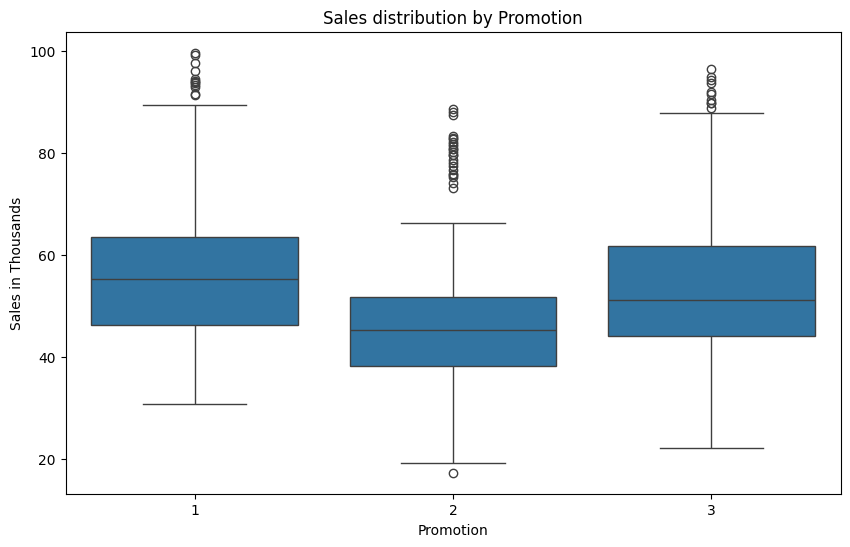

In [5]:
#Understanding the distribution of Promotions
plt.figure(figsize=(10,6))
sns.boxplot(x='Promotion', y='SalesInThousands', data=camp_df)
plt.title('Sales distribution by Promotion')
plt.ylabel('Sales in Thousands')
plt.xlabel('Promotion')
plt.show()

In [ ]:
# Investigating outliers in the dataset

# Calculating IQR to identify outliers
Q1 = camp_df['SalesInThousands'].quantile(0.25)
Q3 = camp_df['SalesInThousands'].quantile(0.75)
IQR = Q3 - Q1

# Defining the bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identifying outliers
prom_outliers = camp_df[(camp_df['SalesInThousands'] < lower_bound) | (camp_df['SalesInThousands'] > upper_bound)]
prom_upper_outliers = camp_df[camp_df['SalesInThousands'] > upper_bound]
prom_lower_outliers = camp_df[camp_df['SalesInThousands'] < lower_bound]

prom_outliers

The outliers are occurring in larger markets, it might make sense that these locations naturally have higher sales

# Statistical Testing

Defining the hypothesis

Null Hypothesis: There is no significant difference in sales across the three promotion strategies<br>
Alternative Hypotheis: Atleast one promotion leads to significantly different sales compared to others

In [7]:
#performing ANOVA test to check if there is a significant difference in sales between the promotions
from scipy.stats import f_oneway

prom_1=camp_df[camp_df['Promotion']==1]['SalesInThousands']
prom_2=camp_df[camp_df['Promotion']==2]['SalesInThousands']
prom_3=camp_df[camp_df['Promotion']==3]['SalesInThousands']

f_oneway(prom_1, prom_2, prom_3)

F_onewayResult(statistic=np.float64(21.953485793080677), pvalue=np.float64(6.765849261408714e-10))

Since the p-value is significantly less than 0.05, you can conclude that there is a statistically significant difference in sales between at least one pair of the promotions.

# Post Hoc Testing

In [9]:
#Post hoc tukey's HSD test to check which promotions are significantly different
from statsmodels.stats.multicomp import pairwise_tukeyhsd

tukey = pairwise_tukeyhsd(endog=camp_df['SalesInThousands'], groups=camp_df['Promotion'], alpha=0.05)
tukey.summary()

group1,group2,meandiff,p-adj,lower,upper,reject
1,2,-10.7696,0.0,-14.7738,-6.7654,True
1,3,-2.7345,0.2444,-6.7388,1.2697,False
2,3,8.0351,0.0,4.1208,11.9493,True


Key Findings:

Promotion 1 significantly underperformed compared to Promotion 2, with sales lower by about $10.77K.
There was no significant difference in sales between Promotion 1 and Promotion 3 (difference of $2.73K), indicating they performed similarly.
Promotion 2 significantly outperformed Promotion 3, with sales higher by about $8.04K.
Conclusion:

Promotion 2 is the most effective marketing strategy for boosting sales of the new item.
Promotion 3 is better than Promotion 1, but not significantly enough to be a strong competitor.

In [10]:
#Effect size calculation
from statistics import mean
from math import sqrt

def cohens_d(group1, group2):
    diff = mean(group1) - mean(group2)
    n1, n2 = len(group1), len(group2)
    var1 = np.var(group1)
    var2 = np.var(group2)
    pooled_var = (n1 * var1 + n2 * var2) / (n1 + n2)
    d = diff / sqrt(pooled_var)
    return d

#Cohen's d for promotion 1 and 2
d_1_2=cohens_d(prom_1, prom_2)

#Cohen's d for promotion 2 and 3
d_2_3=cohens_d(prom_2, prom_3)

d_1_2, d_2_3



(0.6828490482994812, -0.504821616166886)

Cohen's d interpretation
General Guidelines for Cohen's d Interpretation:
Small Effect: 0.2
Medium Effect: 0.5
Large Effect: 0.8

Summary
The 0.68 indicates that the first comparison shows a strong difference favoring one promotion, while the -0.50 suggests a notable difference, but with Promotion 1 being less effective compared to Promotion 3.
In decision-making terms, these values provide solid evidence that certain promotions have a significant impact on sales and can guide the marketing strategy effectively.